In [310]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
%matplotlib inline

In [311]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~')

# 1.데이터 불러오기

In [312]:
# 상반기 주유소 판매 데이터 불러오기
first = pd.read_csv('../data/2019년 상반기 주유소 판매가격.csv', encoding='cp949')
first.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0


In [313]:
second = pd.read_csv('../data/2019년 하반기 주유소 판매가격.csv', encoding='cp949')
second.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190701,SK에너지,셀프,1777,1577,1477,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190702,SK에너지,셀프,1777,1577,1477,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190703,SK에너지,셀프,1777,1577,1477,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190704,SK에너지,셀프,1777,1577,1477,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190705,SK에너지,셀프,1777,1577,1477,0


In [314]:
# 상반기 판매가격 데이터 프레임 결측치 조회
first.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [315]:
# 하반기 판매가격 데이터 프레임 결측치 조회
second.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

# 2. 데이터 결합

In [316]:
# 상반기와 하반기 데이터를 상하로 결합
df = pd.concat([first, second])
df

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0
...,...,...,...,...,...,...,...,...,...,...,...
91119,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191227,GS칼텍스,셀프,0,1540,1389,1100
91120,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191228,GS칼텍스,셀프,0,1540,1389,1100
91121,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191229,GS칼텍스,셀프,0,1540,1389,1100
91122,A0032659,서울 중랑구,지에스칼텍스㈜ 소망주유소,서울 중랑구 망우로 475,20191230,GS칼텍스,셀프,0,1540,1389,1100


# 3. 데이터 가공 및 분석

In [317]:
# 데이터 프레임 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      181714 non-null  object
 1   지역      181714 non-null  object
 2   상호      181714 non-null  object
 3   주소      181714 non-null  object
 4   기간      181714 non-null  int64 
 5   상표      181714 non-null  object
 6   셀프여부    181714 non-null  object
 7   고급휘발유   181714 non-null  int64 
 8   휘발유     181714 non-null  int64 
 9   경유      181714 non-null  int64 
 10  실내등유    181714 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 16.6+ MB


In [318]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()

array(['SK에너지', 'GS칼텍스', 'S-OIL', '현대오일뱅크', '알뜰주유소', 'NH-OIL', '알뜰(ex)',
       '자가상표'], dtype=object)

In [319]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()

array(['서울 강남구', '서울 강동구', '서울 강북구', '서울 강서구', '서울 관악구', '서울 광진구',
       '서울 구로구', '서울 금천구', '서울 노원구', '서울 도봉구', '서울 동대문구', '서울 동작구',
       '서울 마포구', '서울 서대문구', '서울 서초구', '서울 성동구', '서울 성북구', '서울 송파구',
       '서울 양천구', '서울 영등포구', '서울 용산구', '서울 은평구', '서울 종로구', '서울 중구',
       '서울 중랑구'], dtype=object)

In [320]:
# 지역 컬럼의 값을 이용하여 시와 구를 분리
df['시']=df['지역'].str.split(' ').str[0]
df['구']=df['지역'].str.split(' ').str[1]
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울,강남구


In [321]:
# 시 컬럼의 서울을 서울특별시로 변환
df.loc[df['시']=='서울','시']='서울특별시'
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190101,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190102,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190103,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190104,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,20190105,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구


In [322]:
# 기간 컬럼을 datetime 형식으로 변경
df['기간'] = pd.to_datetime(df['기간'], format='%Y%m%d', errors='raise')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 181714 entries, 0 to 91123
Data columns (total 13 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      181714 non-null  object        
 1   지역      181714 non-null  object        
 2   상호      181714 non-null  object        
 3   주소      181714 non-null  object        
 4   기간      181714 non-null  datetime64[ns]
 5   상표      181714 non-null  object        
 6   셀프여부    181714 non-null  object        
 7   고급휘발유   181714 non-null  int64         
 8   휘발유     181714 non-null  int64         
 9   경유      181714 non-null  int64         
 10  실내등유    181714 non-null  int64         
 11  시       181714 non-null  object        
 12  구       181714 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 19.4+ MB


,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구


In [323]:
# 기간 컬럼에서 dt 타입을 이용하여 년, 월, 일, 요일 컬럼 생성
df['년'] = df['기간'].dt.year
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday

df.loc[df['요일']==0,'요일']='Monday'
df.loc[df['요일']==1,'요일']='Tuesday'
df.loc[df['요일']==2,'요일']='Wednesday'
df.loc[df['요일']==3,'요일']='Thursday'
df.loc[df['요일']==4,'요일']='Friday'
df.loc[df['요일']==5,'요일']='Saturday'
df.loc[df['요일']==6,'요일']='Sunday'

df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday


In [324]:
# 휘발유 가격이 비싼 5개 판매가격을 출력하세요.
df.sort_values(by='휘발유', ascending=False).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
86620,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-24,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,24,Tuesday
86626,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-30,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,30,Monday
86627,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-10-01,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,10,1,Tuesday
86621,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-25,SK에너지,일반,2649,2356,2196,0,서울특별시,중구,2019,9,25,Wednesday
86622,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2019-09-26,SK에너지,일반,2699,2356,2196,0,서울특별시,중구,2019,9,26,Thursday


In [325]:
# 휘발유 가격이 저렴한 5개 판매가격을 출력하세요. (단 휘발유가 0원인 데이터는 제외)

df[df['휘발유']!=0].sort_values(by='휘발유', ascending=True).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
13148,A0033328,서울 강서구,KH에너지(주)직영 KH외발산주유소,서울 강서구 방화대로 30,2019-02-07,SK에너지,셀프,1788,1255,1155,0,서울특별시,강서구,2019,2,7,Thursday
82475,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-31,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,31,Thursday
82474,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-01-30,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,1,30,Wednesday
82476,A0000605,서울 은평구,삼융주유소,서울 은평구 수색로 299 (수색동),2019-02-01,SK에너지,일반,0,1260,1160,0,서울특별시,은평구,2019,2,1,Friday
82998,A0000690,서울 은평구,지에스칼텍스(주)수색뉴타운주유소,서울 은평구 수색로 350 (수색동),2019-01-26,GS칼텍스,셀프,0,1265,1165,0,서울특별시,은평구,2019,1,26,Saturday


In [326]:
# 상표별 평균 휘발유 가격을 계산하세요.
price_brand = df.pivot_table(index='상표',values='휘발유', aggfunc='mean').rename(columns={'휘발유': 'mean'})
price_brand

,mean
상표,
GS칼텍스,1564.029014
NH-OIL,1449.088889
S-OIL,1532.302882
SK에너지,1612.147153
알뜰(ex),1431.347945
알뜰주유소,1447.875902
자가상표,1492.085540
현대오일뱅크,1515.458244


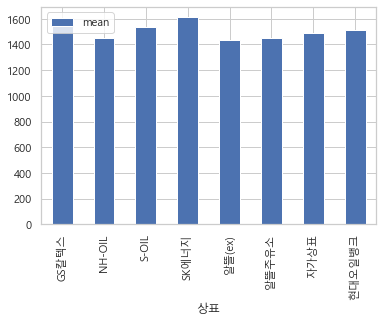

In [327]:
# 상표별 평균 휘발유 가격을 시각화하세요.
price_brand.plot(kind='bar')
plt.show()

In [328]:
# 상표와 셀프여부별 평균 휘발유 가격을 계산하세요.
price_self_brand = df.pivot_table(index=['상표','셀프여부'], values='휘발유', aggfunc='mean').rename(columns={'휘발유': 'mean'})
price_self_brand

mean
상표     셀프여부             
GS칼텍스  셀프    1481.410074
       일반    1610.060123
NH-OIL 일반    1449.088889
S-OIL  셀프    1481.437428
       일반    1579.451162
SK에너지  셀프    1504.853863
       일반    1690.377765
알뜰(ex) 셀프    1431.347945
알뜰주유소  셀프    1434.726027
       일반    1455.372511
자가상표   셀프    1494.409449
       일반    1491.740351
현대오일뱅크 셀프    1483.546767
       일반    1534.254225

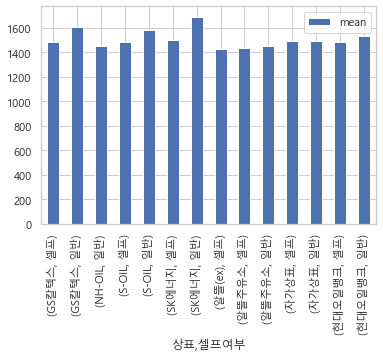

In [329]:
# 상표와 셀프여부별 평균 휘발유 가격을 시각화하세요.
price_self_brand.plot(kind='bar')
plt.show()

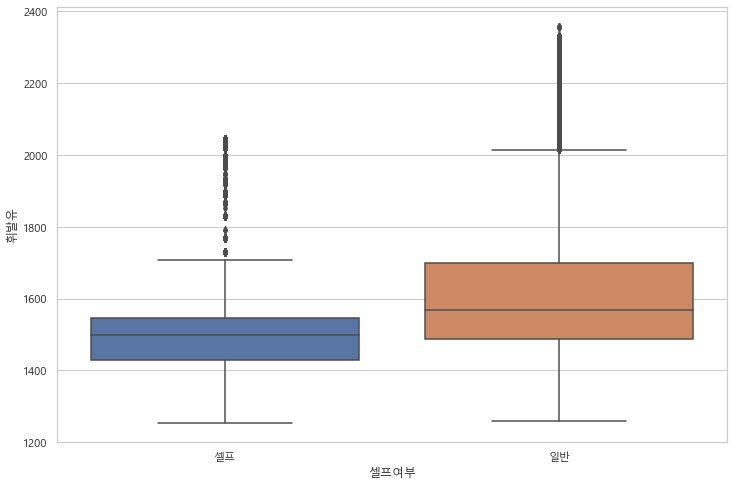

In [330]:
# 셀프여부에 따라 휘발유 가격을 boxplot으로 시각화해보세요.
# 휘발유가 0인 데이터는 제외하고 시각화합니다.
# price_self = df[df['휘발유']!=0].pivot_table(index='셀프여부', values='휘발유')
# price_self

plt.figure(figsize=(12,8))
sns.boxplot(x = '셀프여부', y='휘발유', data=df[df['휘발유']!=0])
plt.show()

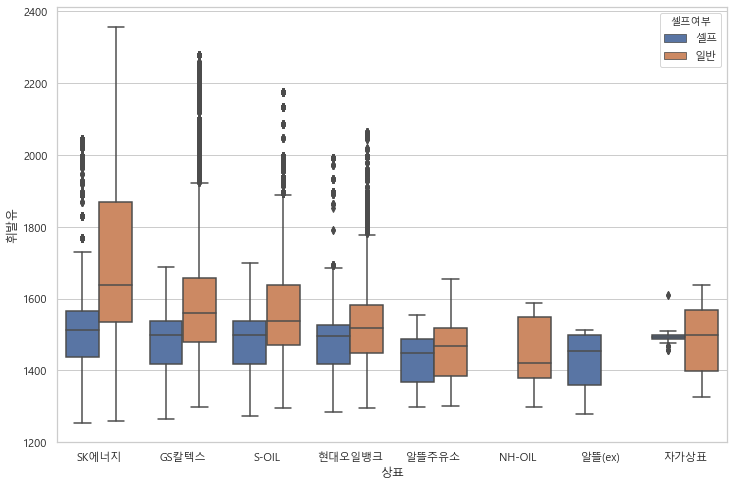

In [331]:
# 휘발유 가격과 일반 주유소의 가격을 boxplot을 이용하여 시각화해보세요.
# 휘발유가 0인 데이터는 제외하고 시각화합니다.

plt.figure(figsize=(12,8))
sns.boxplot(x = '상표', y='휘발유', hue='셀프여부',data=df[df['휘발유']!=0])
plt.show()

In [332]:
# 지역별 평균 휘발유 가격을 계산하세요
gu_price = df.pivot_table(index='구', values='휘발유', aggfunc='mean').rename(columns={'휘발유':'mean'}).sort_values(by='mean',ascending=False)
gu_price

,mean
구,
중구,1976.948052
용산구,1882.049825
종로구,1838.554945
강남구,1713.093581
마포구,1689.755616
성동구,1583.659561
서초구,1577.131304
강동구,1576.685264
영등포구,1568.279506


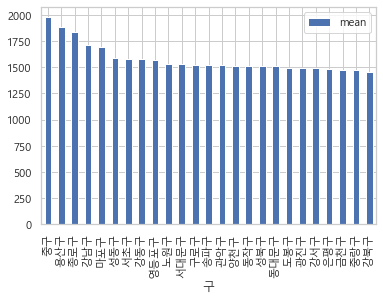

In [333]:
# 지역별 평균 휘발유 가격을 시각화하세요.
gu_price.plot(kind='bar')
plt.show()

In [334]:
# 월별 평균 휘발유 가격을 계산하세요
month_price = df.pivot_table(index='월', values='휘발유', aggfunc='mean').rename(columns={'휘발유':'mean'}).sort_values(by='mean')
month_price

,mean
월,
2,1446.624956
3,1465.159889
1,1466.554672
4,1519.481056
7,1585.726529
8,1589.339464
6,1605.343367
5,1606.096255
11,1620.687606


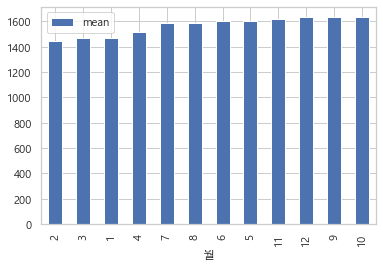

In [335]:
# 월별 평균 휘발유 가격을 시각화 하세요.
month_price.plot(kind='bar')
plt.show()

In [336]:
# pivot_table 함수를 이용하여 구와 월 컬럼을 이용하여 평균 휘발유 가격을 계산하세요

month_gu_price = df.pivot_table(index='월', values='휘발유', columns='구')
month_gu_price

구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,...,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
월,,,,,,,,,,,,,,,,,,,,,
1,1619.865825,1503.383302,1357.002488,1376.357474,1429.822262,1379.168459,1418.589124,1360.297767,1406.245161,1373.606112,...,1479.271347,1403.604488,1417.573361,1404.158915,1486.227823,1781.412903,1363.895636,1749.433692,1848.913978,1360.405242
2,1600.945536,1478.109244,1345.565934,1370.397959,1405.984127,1362.851190,1408.949675,1337.986264,1397.600000,1365.634951,...,1466.242105,1386.097027,1406.561503,1389.676991,1454.418527,1739.352645,1330.018908,1730.007937,1848.380952,1343.332589
3,1616.143548,1468.138277,1342.990074,1392.716129,1403.370510,1388.360215,1427.221408,1371.192982,1421.683871,1390.093190,...,1480.578748,1397.505865,1421.064581,1415.321622,1466.712551,1806.438710,1367.174573,1741.992832,1870.634409,1364.818376
4,1666.350000,1526.341667,1414.246154,1447.910749,1456.301230,1451.507407,1477.038052,1438.646154,1484.722222,1451.424861,...,1528.055118,1450.840909,1464.520334,1479.093793,1522.575000,1836.563474,1439.952941,1779.411111,1904.650000,1429.393333
5,1739.208232,1605.267206,1500.025126,1543.218433,1548.151210,1547.330341,1566.923642,1529.620347,1586.740175,1545.358423,...,1617.527514,1546.357771,1553.783620,1558.715561,1602.545363,1893.453362,1539.197343,1856.232975,1985.540845,1518.455914
6,1744.065833,1608.388309,1491.889744,1522.746425,1564.633333,1540.320370,1562.271212,1510.461538,1569.823661,1548.606679,...,1626.147348,1554.769697,1554.568300,1548.231283,1586.283473,1901.231111,1531.676529,1863.500000,2011.624242,1512.642222
7,1734.204712,1588.002020,1469.147132,1502.133396,1543.155242,1508.003584,1542.331378,1491.776675,1552.664516,1523.568696,...,1600.178368,1534.840176,1540.997980,1525.377261,1570.332659,1901.079570,1507.068311,1860.078853,2004.487603,1480.929293
8,1735.209040,1589.324597,1468.318408,1508.055028,1543.354839,1512.141818,1543.788856,1491.372208,1556.690323,1526.870968,...,1601.345420,1544.298969,1545.417339,1532.414729,1574.178427,1902.374194,1508.076046,1863.913978,2006.897849,1493.768145
9,1773.644167,1638.926931,1514.569231,1554.135693,1586.991649,1558.492278,1585.204545,1539.167526,1601.920000,1570.620387,...,1646.283730,1581.690363,1597.801463,1576.305195,1629.180396,1946.780761,1549.731373,1917.268199,2056.847222,1530.306250


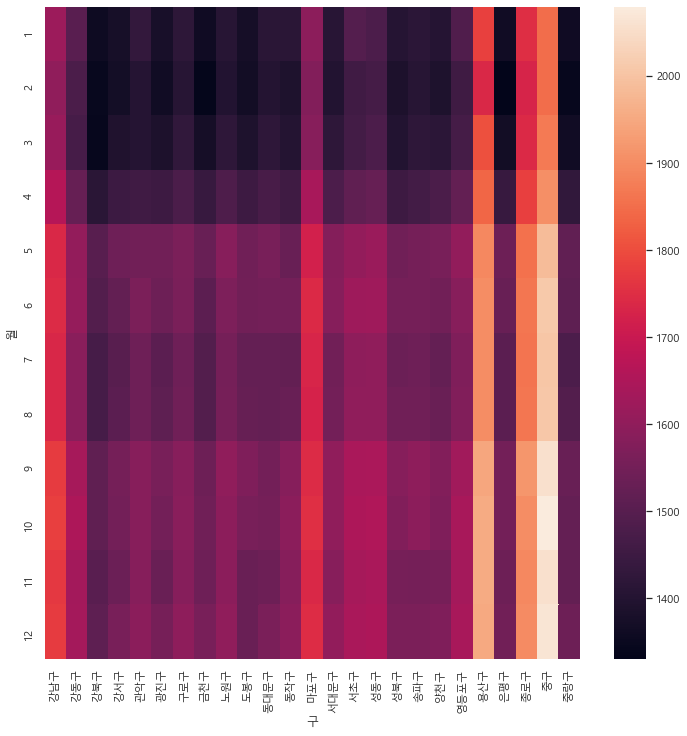

In [337]:
plt.figure(figsize=(12,12))
sns.heatmap(data=month_gu_price)
plt.show()

In [338]:
sns.set(style='whitegrid')


In [339]:
# rs = np.random.RandomState(365)
# values=rs.randn(365,4).cumsum(axis=0)
# dates=pd.date_range("1 1 2016", periods=365, freq='D')
# data = pd.DataFrame(values, dates, columns=["A", "B", "C", "D"])
# data = data.rolling(7).mean()
# sns.lineplot(data=data, palette='tab10', linewidth=2.5)

In [340]:
df.head() #기본데이터

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-01,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-02,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,2,Wednesday
2,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-03,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,3,Thursday
3,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-04,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,4,Friday
4,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,2019-01-05,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,5,Saturday


# 고급휘발유를 가장 많이 제공하고 있는 구는 어디일까??

In [341]:
#지역과 상호별로 고급휘발유 평균가격을 표시
rlg_name_highoil = df.pivot_table(index=['지역','상호'], values='고급휘발유', aggfunc='mean')
rlg_name_highoil.head()

고급휘발유
지역     상호                                
서울 강남구 (주)동하힐탑셀프주유소           1753.293151
       (주)만정에너지               2246.928767
       (주)보성 세곡주유소               0.000000
       (주)선진도곡주유소              513.476712
       (주)소모에너지엔테크놀러지 쎈트럴주유소  2070.221918

In [342]:
#인덱스 갱신
reset_rlg_name_highoil = rlg_name_highoil.reset_index()
reset_rlg_name_highoil.head()

,지역,상호,고급휘발유
0,서울 강남구,(주)동하힐탑셀프주유소,1753.293151
1,서울 강남구,(주)만정에너지,2246.928767
2,서울 강남구,(주)보성 세곡주유소,0.000000
3,서울 강남구,(주)선진도곡주유소,513.476712
4,서울 강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소,2070.221918


In [343]:
#고급휘발유가 0이 아닌것만 센다.
highoil = reset_rlg_name_highoil[reset_rlg_name_highoil['고급휘발유']!=0]['지역'].value_counts()
highoil.index
highoil.values

array([36, 28, 15, 15, 13, 10,  9,  9,  8,  8,  7,  7,  7,  7,  6,  6,  5,
        4,  4,  4,  4,  3,  3,  2,  1], dtype=int64)

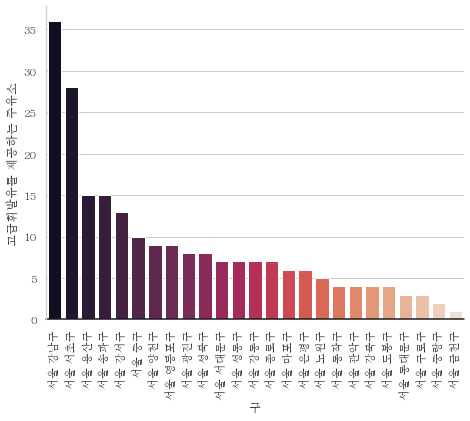

In [344]:
#seaborn barplot을 이용했다.
plt.rcParams['font.family'] = 'Batang' #글씨체는 바탕으로 설정.

f, (ax1) = plt.subplots(1, 1, figsize=(7, 5))  
# f : figure / ax1 : subplot / subplot(row, col, figsize)  row개수 조절로 표시할 barplot개수 조절 가능

sns.barplot(x = highoil.index, y=highoil.values, palette='rocket', ax=ax1) #x에 지역, y에 고급휘발유판매하는 주유소 개수
ax1.axhline(0, color="k", clip_on=False)
ax1.set_ylabel("고급휘발유를 제공하는 주유소")

sns.despine(bottom=True)
plt.tight_layout(h_pad=2)
plt.xlabel('구')
plt.xticks(rotation=90)
plt.show()

In [345]:
import matplotlib.font_manager as fm

# 참고: 설치된 폰트 출력
font_list = [font.name for font in fm.fontManager.ttflist]
font_list

['DejaVu Sans Display',
 'DejaVu Serif',
 'STIXSizeFourSym',
 'cmex10',
 'cmss10',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'STIXNonUnicode',
 'STIXSizeTwoSym',
 'cmsy10',
 'cmb10',
 'STIXGeneral',
 'cmmi10',
 'STIXSizeOneSym',
 'cmtt10',
 'STIXGeneral',
 'DejaVu Serif Display',
 'DejaVu Serif',
 'DejaVu Sans',
 'STIXNonUnicode',
 'STIXSizeFourSym',
 'DejaVu Sans',
 'STIXSizeOneSym',
 'STIXGeneral',
 'DejaVu Sans Mono',
 'DejaVu Sans',
 'DejaVu Sans Mono',
 'STIXSizeThreeSym',
 'DejaVu Serif',
 'DejaVu Serif',
 'cmr10',
 'STIXNonUnicode',
 'DejaVu Sans',
 'STIXSizeThreeSym',
 'STIXSizeFiveSym',
 'STIXSizeTwoSym',
 'STIXNonUnicode',
 'DejaVu Sans Mono',
 'Colonna MT',
 'Comic Sans MS',
 'Trebuchet MS',
 'Imprint MT Shadow',
 'Rage Italic',
 'Goudy Stout',
 'Candara',
 'Microsoft New Tai Lue',
 'Bauhaus 93',
 'Calibri',
 'Cambria',
 'Bodoni MT',
 'Poor Richard',
 'Bradley Hand ITC',
 'HYShortSamul-Medium',
 'Palatino Linotype',
 '?? ??? ?L',
 'Calibri',
 'Segoe UI Symbol',
 'Cambria',
 'Fra

# 국제유가랑 상관관계를 확인해보고 싶다!

In [346]:
wti_tx_oil = pd.read_csv('../data/DCOILWTICO.csv') # 불러오기
wti_tx_oil

,DATE,DCOILWTICO
0,2019-01-02,46.31
1,2019-01-03,46.92
2,2019-01-04,47.76
3,2019-01-07,48.27
4,2019-01-08,49.58
...,...,...
255,2019-12-25,.
256,2019-12-26,61.72
257,2019-12-27,61.76
258,2019-12-30,61.66


In [347]:
wti_tx_oil.rename(columns={'DATE':'datetime','DCOILWTICO':'wti_oil'}, inplace=True) # 컬럼 이름 바꾸기

In [348]:
wti_tx_oil['datetime'] = pd.to_datetime(wti_tx_oil['datetime'], format='%Y-%m-%d', errors='raise') #datetime형식으로

In [349]:
wti_tx_oil = wti_tx_oil.resample('1D', on='datetime').first().drop('datetime', 1).reset_index() #비어있는 날짜 채우기

In [350]:
data = []  
data.insert(0, {'datetime': np.datetime64('2019-01-01'), 'wti_oil': '.'}) 
wti_tx_oil = pd.concat([pd.DataFrame(data), wti_tx_oil], ignore_index=True) #1월 1일이 없어서 넣어줌.

In [351]:
#wti_tx_oil.fillna(0, inplace=True) #NaN값 0으로 초기화

In [352]:
wti_tx_oil['wti_oil'].replace({'.': np.nan}, inplace=True) #'.'값 NaN으로 초기화

In [353]:
wti_tx_oil.fillna(method='bfill',inplace=True) #결측값을 뒷방향으로부터 채움.   대박...

In [354]:
wti_tx_oil_f = wti_tx_oil.astype({'wti_oil': np.float}) #실수형으로 바꿈

In [355]:
wti_tx_oil_f.head()
# wti_tx_oil_f.plot(x='datetime',y='wti_oil', kind='line')

,datetime,wti_oil
0,2019-01-01,46.31
1,2019-01-02,46.31
2,2019-01-03,46.92
3,2019-01-04,47.76
4,2019-01-05,48.27


# 환율 불러오기

In [356]:
exchange_rate = pd.read_csv('../data/exchange_rate.csv')#불러오기
exchange_rate.head()

,Unnamed: 0,Time Serie,AUSTRALIA - AUSTRALIAN DOLLAR/US$,EURO AREA - EURO/US$,NEW ZEALAND - NEW ZELAND DOLLAR/US$,UNITED KINGDOM - UNITED KINGDOM POUND/US$,BRAZIL - REAL/US$,CANADA - CANADIAN DOLLAR/US$,CHINA - YUAN/US$,HONG KONG - HONG KONG DOLLAR/US$,...,SINGAPORE - SINGAPORE DOLLAR/US$,DENMARK - DANISH KRONE/US$,JAPAN - YEN/US$,MALAYSIA - RINGGIT/US$,NORWAY - NORWEGIAN KRONE/US$,SWEDEN - KRONA/US$,SRI LANKA - SRI LANKAN RUPEE/US$,SWITZERLAND - FRANC/US$,TAIWAN - NEW TAIWAN DOLLAR/US$,THAILAND - BAHT/US$
0,0,2000-01-03,1.5172,0.9847,1.9033,0.6146,1.805,1.4465,8.2798,7.7765,...,1.6563,7.329,101.7,3.8,7.964,8.443,72.3,1.5808,31.38,36.97
1,1,2000-01-04,1.5239,0.97,1.9238,0.6109,1.8405,1.4518,8.2799,7.7775,...,1.6535,7.218,103.09,3.8,7.934,8.36,72.65,1.5565,30.6,37.13
2,2,2000-01-05,1.5267,0.9676,1.9339,0.6092,1.856,1.4518,8.2798,7.778,...,1.656,7.208,103.77,3.8,7.935,8.353,72.95,1.5526,30.8,37.1
3,3,2000-01-06,1.5291,0.9686,1.9436,0.607,1.84,1.4571,8.2797,7.7785,...,1.6655,7.2125,105.19,3.8,7.94,8.3675,72.95,1.554,31.75,37.62
4,4,2000-01-07,1.5272,0.9714,1.938,0.6104,1.831,1.4505,8.2794,7.7783,...,1.6625,7.2285,105.17,3.8,7.966,8.415,73.15,1.5623,30.85,37.3


In [286]:
korea_usa = exchange_rate[-261:][['Time Serie','KOREA - WON/US$']] # 2019년 값만 한국 달러 정보만 슬라이싱

In [287]:
korea_usa.rename(columns={'Time Serie':'datetime','KOREA - WON/US$':'won_us'},inplace=True) #컬럼이름바꾸기

In [288]:
korea_usa['datetime'] = pd.to_datetime(korea_usa['datetime'], format='%Y-%m-%d', errors='raise') # datetime형식으로 바꾸기

In [289]:
korea_usa.reset_index(drop=True, inplace=True)  #drop=True : 기존의 인덱스라 'index'컬럼으로 새로 만들어지는 걸 방지. 0~364인덱싱으로 바꾸기

In [290]:
korea_usa = korea_usa.resample('1D', on='datetime').first().drop('datetime', 1).reset_index() #비어있는 날짜 채우기

In [291]:
#korea_usa.fillna(0, inplace=True) #NaN값 0으로 초기화

In [292]:
korea_usa['won_us'].replace({'ND': np.nan}, inplace=True) #ND값 NaN으로 초기화

In [293]:
korea_usa.fillna(method='bfill',inplace=True) #결측값을 뒷방향으로부터 채움. 

In [294]:
korea_usa_f = korea_usa.astype({'won_us': np.float})#실수형으로 바꾸기

In [295]:
korea_usa_f
korea_usa_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   datetime  365 non-null    datetime64[ns]
 1   won_us    365 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 5.8 KB


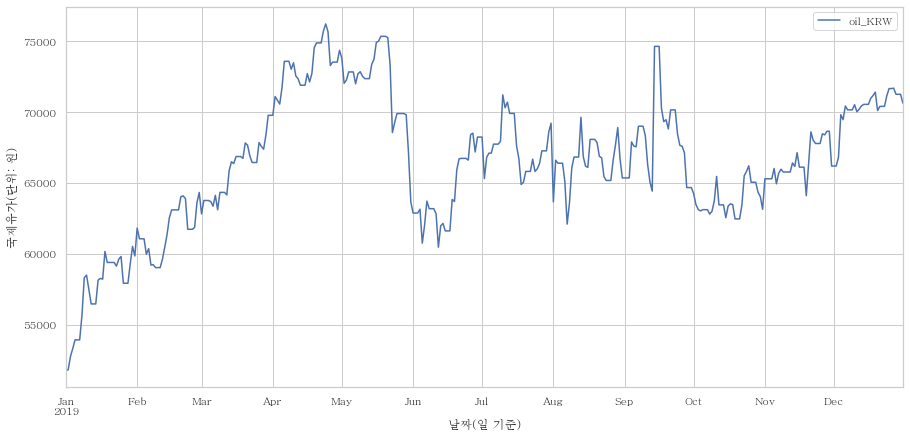

In [296]:
date_oil_KRW = pd.merge(wti_tx_oil_f, korea_usa_f)
date_oil_KRW['oil_KRW'] = date_oil_KRW['wti_oil']*date_oil_KRW['won_us']
date_oil_KRW.rename(columns={'기간':'datetime'},inplace=True)
date_oil_KRW.head()

date_oil_KRW.plot(x='datetime', y='oil_KRW',figsize=(15.0,7.0), kind='line')
plt.ylabel('국제유가(단위: 원)')
plt.xlabel('날짜(일 기준)')
plt.show()
# 
# merged.dtypes
# merged.info()

In [297]:
date_oil_KRW.rename(columns={'datetime':'기간'},inplace=True)
date_oil_KRW.head()

,기간,wti_oil,won_us,oil_KRW
0,2019-01-01,46.31,1119.11,51825.9841
1,2019-01-02,46.31,1119.11,51825.9841
2,2019-01-03,46.92,1124.64,52768.1088
3,2019-01-04,47.76,1116.73,53335.0248
4,2019-01-05,48.27,1117.50,53941.7250


In [298]:
df_plus_wti = pd.merge(date_oil_KRW,df,on='기간') #'기간'으로 merge

In [299]:
df_plus_wti.head()

,기간,wti_oil,won_us,oil_KRW,번호,지역,상호,주소,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,시,구,년,월,일,요일
0,2019-01-01,46.31,1119.11,51825.9841,A0006039,서울 강남구,(주)동하힐탑셀프주유소,서울 강남구 논현로 640,SK에너지,셀프,1673,1465,1365,0,서울특별시,강남구,2019,1,1,Tuesday
1,2019-01-01,46.31,1119.11,51825.9841,A0000525,서울 강남구,(주)만정에너지,서울 강남구 봉은사로 433 (삼성동),GS칼텍스,일반,2169,1939,1759,1279,서울특별시,강남구,2019,1,1,Tuesday
2,2019-01-01,46.31,1119.11,51825.9841,A0001219,서울 강남구,(주)보성 세곡주유소,서울특별시 강남구 헌릉로 731 (세곡동),SK에너지,셀프,0,1438,1299,0,서울특별시,강남구,2019,1,1,Tuesday
3,2019-01-01,46.31,1119.11,51825.9841,A0009061,서울 강남구,(주)선진도곡주유소,서울 강남구 도곡로 162 (도곡동),S-OIL,일반,0,1495,1390,0,서울특별시,강남구,2019,1,1,Tuesday
4,2019-01-01,46.31,1119.11,51825.9841,A0001217,서울 강남구,(주)소모에너지엔테크놀러지 쎈트럴주유소,서울 강남구 삼성로 335 (대치동),GS칼텍스,일반,1913,1699,1575,1182,서울특별시,강남구,2019,1,1,Tuesday


In [300]:
date_normal_oil = df_plus_wti.pivot_table(index='기간', values=['고급휘발유','휘발유','경유'], aggfunc='mean')
date_normal_oil.reset_index(inplace=True)

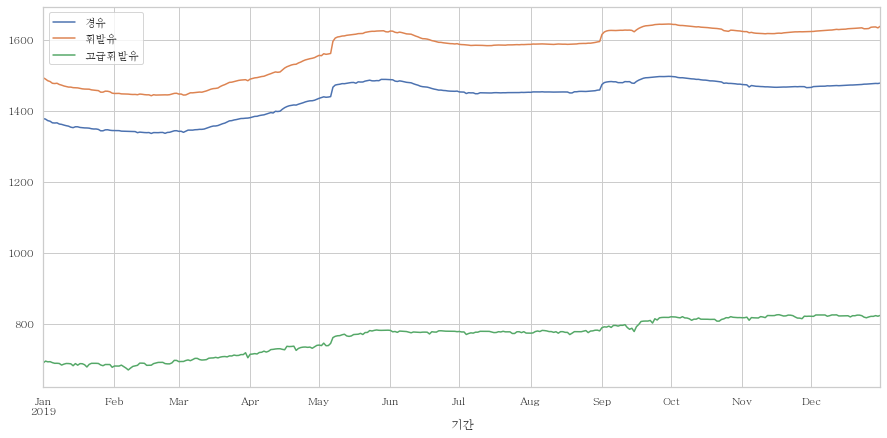

In [301]:
date_normal_oil.plot( x = '기간', y=['경유','휘발유','고급휘발유'], figsize=(15.0,7.0), kind='line')
plt.show()

In [302]:
df_wti_final = df_plus_wti.pivot_table(index='기간', values=['oil_KRW','고급휘발유','휘발유','경유'], aggfunc='mean')
df_wti_final.reset_index(inplace=True)
df_wti_final['oil_KRW'] = df_wti_final['oil_KRW']/158.987  #리터당 가격으로 변환
df_wti_final.head()

,기간,oil_KRW,경유,고급휘발유,휘발유
0,2019-01-01,325.976238,1378.394477,689.378698,1493.439842
1,2019-01-02,325.976238,1376.814596,694.696252,1489.710059
2,2019-01-03,331.902035,1372.573964,692.599606,1485.027613
3,2019-01-04,335.467836,1370.875494,693.065217,1482.749012
4,2019-01-05,339.283872,1366.398020,690.320792,1477.875248


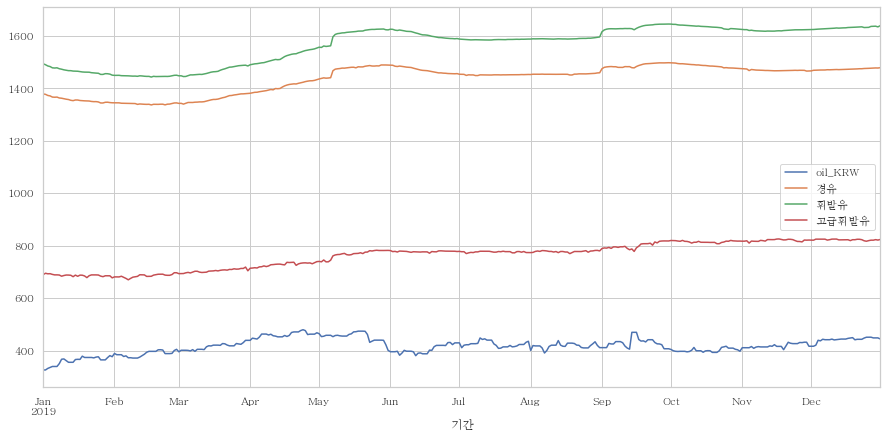

In [303]:
df_wti_final.plot( x = '기간', y=['oil_KRW','경유','휘발유','고급휘발유'], figsize=(15.0,7.0), kind='line')
plt.show()

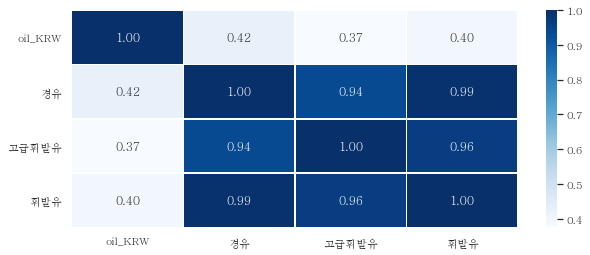

In [307]:
plt.figure(figsize=(10,4))
sns.heatmap(data = df_wti_final.corr(), annot=True, 
fmt = '.2f', linewidths=.5, cmap='Blues')